In [1]:
#https://www.geeksforgeeks.org/opencv-facial-landmarks-and-face-detection-using-dlib-and-opencv/

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [2]:
!pip install imutils

In [3]:
!wget -c https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat

"""
inputdir = '/kaggle/working'
"""

inputdir = '/content'

--2020-12-13 00:20:25--  https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat [following]
--2020-12-13 00:20:25--  https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.0

In [4]:
!wget -c https://www.thestatesman.com/wp-content/uploads/2017/08/1493458748-beauty-face-517.jpg
!ls -l
!file shape*

--2020-12-13 00:20:27--  https://www.thestatesman.com/wp-content/uploads/2017/08/1493458748-beauty-face-517.jpg
Resolving www.thestatesman.com (www.thestatesman.com)... 104.21.234.231, 104.21.234.230, 2606:4700:3038::6815:eae7, ...
Connecting to www.thestatesman.com (www.thestatesman.com)|104.21.234.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58434 (57K) [image/jpeg]
Saving to: ‘1493458748-beauty-face-517.jpg’

1493458748-beauty-f 100%[===================>]  57.06K  --.-KB/s    in 0.001s  

2020-12-13 00:20:27 (109 MB/s) - ‘1493458748-beauty-face-517.jpg’ saved [58434/58434]

total 97424
-rw-r--r-- 1 root root    58434 Aug  2  2017 1493458748-beauty-face-517.jpg
drwxr-xr-x 1 root root     4096 Dec  2 22:04 sample_data
-rw-r--r-- 1 root root 99693937 Dec 13 00:20 shape_predictor_68_face_landmarks.dat
/bin/bash: file: command not found


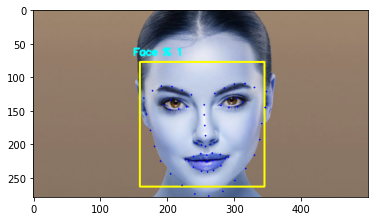

In [5]:
# We import the necessary packages 
from imutils import face_utils 
import numpy as np 
import argparse 
import imutils 
import dlib 
import cv2

# We are initializing the  dlib's face detector (HOG-based) and then  
# creation of the facial landmark predictor 
detector = dlib.get_frontal_face_detector() 
#https://github.com/davisking/dlib-models
predictor = dlib.shape_predictor(os.path.join(inputdir, "shape_predictor_68_face_landmarks.dat"))

# We then load the input image, resize it, and convert it to grayscale 
images = cv2.imread(os.path.join(inputdir, "1493458748-beauty-face-517.jpg") )
images = imutils.resize(images, width = 500) 
gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY) 
  
# We then detect faces in the grayscale image 
rects = detector(gray, 1) 
  
# Now, job is to loop over the face detections 
for (i, rect) in enumerate(rects): 
    # We will determine the facial landmarks for the face region, then 
    # can convert the facial landmark (x, y)-coordinates to a NumPy array 
    shape = predictor(gray, rect) 
    shape = face_utils.shape_to_np(shape) 
  
    # We then convert dlib's rectangle to a OpenCV-style bounding box 
    # [i.e., (x, y, w, h)], then can draw the face bounding box 
    (x, y, w, h) = face_utils.rect_to_bb(rect) 
    cv2.rectangle(images, (x, y), (x + w, y + h), (255, 255, 0), 2) 
  
    # We then show the face number  
    cv2.putText(images, 'Face % {}'.format(i + 1), (x - 10, y - 10), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2) 
  
    # We then loop over the (x, y)-coordinates for the facial landmarks  
    # and draw them on the image 
    for (x, y) in shape: 
        cv2.circle(images, (x, y), 1, (0, 0, 255), -1) 
  
# Now show the output image with the face detections as well as  
# facial landmarks 
#cv2.imshow("Output", images) 
#cv2.waitKey(0)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(images)